In [1]:
%%html
<!-- RTL Fix the jupyter notebook 7  -->
<style>
    .jp-RenderedHTMLCommon {
        padding-top: 2em !important;
  }   
    .jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon * {
        direction: rtl !important;
        text-align:right !important;
  }
    .jp-MarkdownCell .jp-InputArea-editor {
        direction: rtl !important; 
        text-align:right !important;
        padding-top: 2em !important;
  } 

 .jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span {
        text-align:left !important;
        direction: ltr !important;
        unicode-bidi: embed !important;

    }
    .jp-RenderedHTMLCommon pre:has(code) {
      direction: ltr !important;
      text-align: left!important;
    }

</style> 

In [2]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# מילונים (`dict`)

## מוטיבציה למילונים

נזכיר כי לרשימות יש **משמעות לסדר**.  למעשה, מאחורי הקלעים, **רשימה שמורה כקו ישר של תאים בזיכרון**, כל תא מחזיק ערך מסוים. 

כשרוצים **להגיע לאיבר מסוים**, זה נוח - יש לכם כתובת לכל תא, אתם יכולים "לקפוץ" ישר לאינדקס הרצוי ולקרוא את הערך. התהליך הזה קורה כמעט מיד - אם יודעים היכן נמצאת תחילת הרשימה, ניתן לקפוץ ישר למיקום הרצוי.

אם נרצה **להוסיף איבר חדש בסוף הרשימה** (על-ידי append) - אין בעיה! נשים את האיבר בתא פנוי בסוף.
הבעיה מתחילה כשמנסים **להכניס איבר לתחילת הרשימה**: כדי לשמור על הסדר, כל האיברים הקיימים צריכים לזוז מקום אחד קדימה, כלומר, נצטרך להזיז כל איבר מקום אחד. בחן אם קיימים לנו `n` איברים ברשימה, נצטרך לבצע `n` הזזות. זה כבר ייקח יותר **זמן**.
כלומר, אחרות, על מנת להשלים את פעולת העל - הכנסת איבר חדש לתחילת הרשימה - נדרש מספר גבוה של פקודות, או **צעדים**.

נשים לב לשתי נקודות חשובות שבאות לידי ביטוי בדוגמא לעיל:
- עבור פעולות שונות נדרש מספר צעדים שונים על מנת להשלים את ביצוען.
- עבור פעולות מסוימות, מספר הצעדים הדרושים להשלמתן תלוי בקלט (במקרה לעיל, אורך הרשימה) 
- אם מניחים שכל צעד לוקח אותו זמן – פעולות עם יותר צעדים יארכו יותר זמן.

נבחן כעת דוגמא נוספת: **חיפוש איבר ברשימה**. 
על מנת לבדוק אם מספר מסוים נמצא ברשימת מספרים כלשהי, עלינו יהיה לעבור על כל האיבורים ברשימה אחד-אחד ולבדוק אם האם מצאנו את המספר המבוקש.  
בדוגמא זו, עבור רשימה בגודל `n`,  יידרשו `n` צעדים **לכל היותר** על מנת להשלים את הפעולה. כלומר, גם פעולת החיפוש ברשימה אינה קלה, במיוחד כאשר מדובר ברשימה המכילה מספר רב של איברים.

<span style="color: red;">TODO: להוסיף אילוסטרציות</span>

```{admonition} **עצרו וחשבו**
:class: caution

מדוע בדוגמת הכנסת איבר לראש הרשימה נדרשות תמיד `n` הזזות, אך בדוגמת החיפוש נדרשים `n` צעדים **לכל היותר**? ``

```

```{admonition} **שימו לב**
:class: error

בהמשך הקורס נתעמק בדרכים יעילות יותר ופחות לחפש איברים ברשימה תחת הנחות מסוימות, כמו סדר האיברים הרשימה. 
```

לסיכום, רשימות הן מבנה נתונים נוח וגמיש, שמתאים להרבה משימות, אך פעולות מסוימות עלולות להיות איטיות כאשר מספר האיברים גדל.

לסיכום, רשימות הן מבנה נוח וגמיש, אבל יש פעולות מסוימות (כמו הכנסה בהתחלה או חיפוש איבר) שבו רשימה היא פחות **יעילה**. 
כלומר, אם היינו רוצים לשמור את המידע שלנו בדרך שבה **קל להוסיף** וגם **קל לחפש**, רשימה היא לא הטיפוס בשבילנו.

כעת נעסוק במבנה נתונים חדש ובעל חשיבות רבה - מילון (dictionary, או `dict`), שיאפשר לנו לבצע בצורה יותר יעילה חלק מהפעולות שמסורבל לבצע ברשימות.

## מילונים בפייתון

# מילונים: `dict`

<span style="color: red;">TODO: סרטון חגי לגבי מבנה הנתונים מילון. עם התוכן הזה</span>

מילון הוא מבנה נתונים אסוציאטיבי שמאפשר לשמור מידע בצורה של התאמה בין מפתחות לערכים. בניגוד לרשימות, שבהן ניגשים לאיברים לפי המיקום שלהם, במילון הגישה נעשית ישירות לפי **מפתח (key)**. כלומר, אם יש לנו מפתח מסוים, נוכל למצוא את הערך המשויך אליו במהירות ובקלות. 

אחת החוזקות הגדולות של מילון היא **מהירות הגישה לנתונים לפי מפתח**. 
בניגוד לרשימות, שם הגישה מתבצעת לפי מיקום האיבר - האינדקס, במילונים אנו יכולים להשתמש באלמנטים בעלי משמעות, שלאו דווקא קשורים לסדר האיברים במבנה הנתונים שלנו. 
הודות לאופן שבו הוא בנוי, הגישה לערכים לפי מפתח היא מאוד יעילה, הרבה יותר מאשר חיפוש איבר-איבר ברשימה.

כדי להמחיש, נחשוב על דוגמא בה אבי רוצה לקרוא למשה, חברו לספסל הלימודים, הנמצא במרחק 5 כסאות ממנו. מובן שהרבה יותר קל למשה להבין שאבי קורא לו אם פשוט יקרא לו בשמו, מאשר אם יגיד משפט בסגנון "מי שנמצא במרחק 5 כסאות ממני".   

אבל מה יקרה אם קיימים מספר סטונדטים בכיתה בשם "משה"?

לכל מפתח יש ערך יחיד שמקושר אליו, ואם ננסה להוסיף שוב את אותו מפתח – הערך הקודם פשוט יוחלף. לכן, לדוגמא לעיל, נוכל אולי להשתמש בצירוף של שם פרטי ושם משפחה בתור מפתח (אם מניחים כי אין 2 סטונדטים בעלי אותו שם פרטי ושם משפחה).
לחלופין, נוכל להשתמש כמובן בתעודת זהות, אז זה כמובן יהיה תקין, אך פחות אינטואיטיבי.  
במילים אחרות, המפתח חייב **ייחודי**. בנוסף, נעדיף מפתחות שהם **אינטואיטיביים**.  

שימו לב כי בניגוד לרשימה, במילון לא ניתן לשלוט **בסדר** האיברים. 

```{admonition} **כדאי לדעת!**
:class: info

בפועל, החל מפייתון 3.7, הסדר ב`dict` נשמר לפי סדר הכנסת המפתחות והערכים למילון, אך לא נניח סדר כזה במסגרת הקורס.    
    
```


## שימוש בסיסי במילון בפייתון

נניח כי נרצה לייצג בפייתון את המילון המופיע באילוסטרציה הבאה:

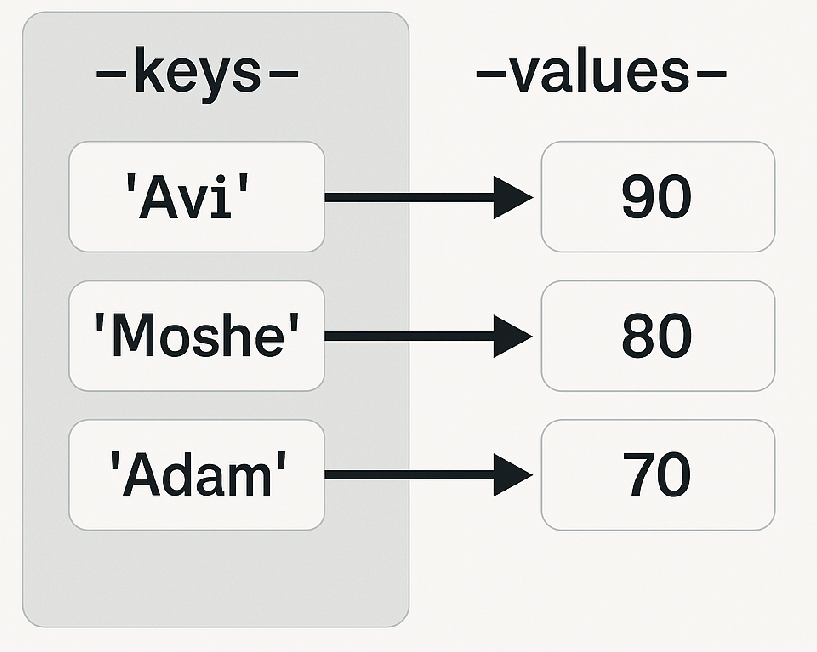

בדומה לרשימות וטאפלים, גם מילונים עטופים בסוגריים - במקרה של מילון מדובר בסוגריים מסולסלים.
לדוגמא, מילון ריק יראה כך: `d={}`.

אך בניגוד לרשימות וטאפלים, **כל אלמנט במילון הוא למעשה צמד של מפתח וערך**.   
המפתח והערך מופרדים ע"י נקודותיים (`:`) וכל זוג של מפתח וערך מופרד באמצעות פסיק (`,`).  


לכן במימוש של המילון המופיע באילוסטרציה ייראה כך:

In [3]:
studs={"Avi": 90, "Moshe": 80, "Adam": 70}

נדגים כעת את השימוש במילון ואת יתרונותיו.  
נניח שנרצה לשמור את ציוני הסטודנטים אבי משה ואדם.  
אם היינו משתמשים ברשימות וטאפלים בלבד, היינו יכולים לשמור זוגות של שמות וציונים ברשימה

In [4]:
grades=[("Avi", 90), ("Moshe", 80), ("Adam", 70)]

נניח כעת כי היינו רוצים לכתוב פונקציה המחזירה את ציונו של סטודנט לפי השם שלו

In [5]:
def get_grade_by_name_lst(name):
    studs=[("Avi", 90), ("Moshe", 80), ("Adam", 70)]
    for cur_stud in studs:
        if cur_stud[0]==name:
            return cur_stud[1]

דוגמא להפעלת הפונקציה:

In [6]:
get_grade_by_name_lst("Moshe")

80

```{admonition} **עצרו וחשבו**
:class: caution

כמה גישות לרשימה נצטרך לעשות במקרה הגרוע ביותר? 

```


כעת נראה מימוש דומה באמצעות מילון:

In [7]:
def get_grade_by_name_dict(name):
    studs = {"Avi": 90, "Moshe": 80, "Adam": 70}
    return studs[name]

In [8]:
get_grade_by_name_dict("Moshe")

80

כלומר, ניתן לגשת מפורשות לכל מפתח שקיים במילון ולקבל את הערך שלו, באמצעות סוגריים מרובעים.

שימו לב כי שני המימושים מחזירים בסופו של דבר את אותה התוצאה, אך המימוש השני עדיף במספר מובנים:
- הקוד יותר **יעיל** - נדרשות פחות גישות לאיבורים למבנה הנתונים שלנו
- הקוד יותר **קריא** - הקודם גם קצר יותר וגם מובן יותר מהמימוש שכתבנו באמצעות רשימות 

ומה היה קורה אם היינו מנסים לגשת למפתח שלא קיים במילון?  
בדומה לשגיאת `index out of range` שקיבלנו ברשימות באינדקסים שלא קיימים, במקרה של מפתח לא קיים נקבל `key error`.

In [9]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}
print(studs["Haim"])

KeyError: 'Haim'

מאחר שגישה למפתח לא קיים תגרום לשגיאה, היינו רוצים לוודא שמפתח קיים במילון לפני שננסה לגשת לערך שלו.
למזלנו, יש כזו אפשרות, על-ידי המילה השמורה `in` שכבר ראינו ברשימות ומחרוזות.

במקרה של מילונים, הפקודה `a in dict` תחזיר `True` אם `a` הוא **מפתח** במילון, ו`False` אחרת.

In [10]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}

print("Johnny" in studs)
print("Avi" in studs)
print(80 in studs) # 80 is a value, not a key, so that will be False.

False
True
False


דרך נוספת לגשת ערכים בצורה בטוחה היא באמצעות המתודה `get`. מתודה זו מאפשרת לנו לגשת לערך של מפתח במילון מבלי לגרום לשגיאה אם המפתח לא קיים.

אם המפתח קיים במילון - המתודה תחזיר לנו את הערך שמקושר לkey.  
אם המפתח לא קיים במילון, המתודה תחזיר לנו None.  
שימו לב כי ניתן לשנות את הערך שחוזר במקרים בהם המפתח לא קיים במילון לכל ערך אלטרנטיבי שנרצה ע"י העברתו בארגומנט השני בפונקציה `get`.

In [11]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}

print(studs.get("Avi")) # The key exists, so we'll get the value

print(studs.get("Johnny")) # The key doesn't exist, so we'll get the default - None

print(studs.get("Johnny", "Student not found")) # The key doesn't exist, so we'll get the default - "not found"

90
None
Student not found


כעת נרצה להוסיף סטודנט חדש למילון.
אין צורך ליצור את המילון מחדש - ניתן להוסיף למילון ערך נוסף על ידי הצבת הערך במפתח המתאים:
``` python
d[key] = value
```
נגיד, נוסיף את חיים למילון הסטודנטים שלנו.

In [12]:
studs["Johnny"] = 95
print(studs)

{'Avi': 90, 'Moshe': 80, 'Adam': 70, 'Johnny': 95}


באופן דומה, אם נבצע השמה ל`d[key]` עבור מפתח שכבר היה במילון, אנחנו **נשנה** את הערך שהיה קיים כבר - נדרוס אותו ונכניס ערך חדש.
לדוגמה, אם נבצע השמה מחדש לציון של משה:

In [13]:
studs["Moshe"] = 90
print(studs)

{'Avi': 90, 'Moshe': 90, 'Adam': 70, 'Johnny': 95}


### תרגול

עכשיו גם אתם תממשו מילון ציונים.
1. צרו מילון ריק בשם `grades`, והדפיסו אותו למסך.

In [14]:
# Write your code here

2. עדכנו את `grades` כך שיכיל ציונים של שלושה סטודנטים:  
    - "Amir" קיבל ציון 95  
    - "Michal" קיבלה ציון 97
    - "Hagai" קיבל ציון 82.  
הדפיסו את המילון למסך.

```{admonition} **רמז**
:class: dropdown, tip
האם תעדיפו לחפש סטודנט ולבדוק מה הציון שלו? או לחפש ציון ולבדוק איזה סטודנט קיבל אותו?
```

In [15]:
# Write your code here

3. הדפיסו את הציון של מיכל.

In [16]:
# Write your code here

4. בדקו אם ל"Maya" יש ציון.
    - אם כן, הדפיסו את הציון שלה.
    - אם לא, הדפיסו הודעה "Maya not found".

In [17]:
# Write your code here

5. הוסיפו למילון את "Maya" שקיבלה ציון 76. הדפיסו שוב את המילון וודאו שמאיה מופיעה בו.

In [18]:
# Write your code here

6. חגי עשה מועד ב' והעלה את הציון שלו ל100! עדכנו את הציון שלו בהתאם. הדפיסו שוב את המילון כדי לוודא שהציון המעודכן של חגי מופיע.

In [19]:
# Write your code here

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

```python
# 1 
grades = {}
print(grades)

# 2
grades["Amir"] = 95
grades["Michal"] = 97
grades["Hagai"] = 82
print(grades)

# 3
print(grades["Michal"])

# 4
if "Maya" in grades:
    print(grades["Maya"])
else:
    print("Maya not found")

# 5
grades["Maya"] = 76
print(grades)

# 6
grades["Hagai"] = 100
print(grades)
```

עכשיו כשהכרנו את הפעולות הבסיסיות של שימוש במילון, בואו נרחיב את סל הכלים שלנו עבור מילון עם אפשרויות מתקדמות ומתודות שימושיות.

### מפתחות מורכבים

אז ראינו שמפתחות הם ייחודיים, ולכן שינוי ערך של מפתח קיים ידרוס את הערך הקודם.

In [20]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}
print(studs)
studs['Moshe'] = 90
print(studs)

{'Avi': 90, 'Moshe': 80, 'Adam': 70}
{'Avi': 90, 'Moshe': 90, 'Adam': 70}


אבל נניח, כפי שהצגנו בדוגמא המקורית, כי ישנם שני סטודנטים בשם משה - בעלי שם משפחה שונה: משה כהן ומשה לוי.  
מובן כי כעת לא נוכל להסתפק בשם הפרטי בלבד כמפתח, מכיוון שערכים של משה כהן ומשה לוי חולקים מפתח זהה.

כדי לפתור את הבעיה, נוכל להוסיף את שם המשפחה למפתח, בנוסף לשם הפרטי. 

ננסה תחילה לממש רעיון זה ע"י הגדרת המפתח כרשימה המכילה את השם הפרטי ושם המשפחה.

In [21]:
studs = {['Moshe', 'Cohen']: 90}

TypeError: unhashable type: 'list'

מדוע קיבלנו שגיאה?  
מכיוון ש**לא ניתן להגדיר רשימה כמפתח, מכיוון שהיא mutable, ואמרנו שמפתחות חייבים להיות immutable**.  



```{admonition} **אז מה אפשר לעשות? איזה טיפוס הוא ממש כמו רשימה, אבל immutable?**
:class: dropdown, caution

ניתן להשתמש ב־`tuples` בתור מפתחות!
```

נסו כעת לממש את הפתרון שהוצג לעיל, תוך שימוש בטיפוס אלטרנטיבי לעיל כמפתח

In [22]:
## Write your code here

### תצוגות מילון (Dictionary Views)

בפייתון קיימות המתודות שמחזירות תצוגות מילון **איטרביליות ודינמיות**. כלומר, ניתן להשתמש בהן בלולאות, לבדוק שייכות של מפתח או ערך עם in, והן משתנות אוטומטית כאשר המילון משתנה.

נתמקד תחילה במתודה `()items` על איברי המילון. (אל תשכחו את הסוגריים!). מתודה זו מחזירה את **המפתח והערך כצמדים**. 

שימוש נפוץ במתודה `()items` הוא בלולאות, בהן נרצה לעבור על כל צמדי המפתחות והערכים.

למשל, אם נרצה להדפיס את כל השמות והציונים של מילון הסטודנטים שלנו שורה אחר שורה, נוכל לעשות זאת כך:

In [23]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}

In [24]:
for key, value in studs.items():
    print(key, ":", value)

Avi : 90
Moshe : 80
Adam : 70


בנוסף, קיימות עוד 2 תצוגות נפוצות: `()keys` ו-`()values`, המחזירות את מפתחות הערכים של המילון:

In [25]:
print("All keys:")
for key in studs.keys():
    print(key)

All keys:
Avi
Moshe
Adam


In [26]:
print("All values:")
for value in studs.values():
    print(value) # No default way to get the key.

All values:
90
80
70


```{admonition} **שימו לב**
:class: error
בד"כ נעדיף לא למשתמש ב`()values`, על מנת לעבור על ערכי המילון מכיוון שבדרך זו אנו עושים מעבר לא יעיל על ערכי המילון ומאבדים את הקשר של ערכים עם המפתחות שלהם (זכרו כי ניגשים לכל ערך מילון באמצעות מפתח!)

```

### מתודות נוספות של מילונים

כעת נלמד עוד מספר מתודות שימושיות של מילונים.

**העתקת מילון `()d.copy`**

המתודה יוצרת **עותק רדוד (shallow copy)** של המילון. כלומר, היא מחזירה **עותק של המילון המקורי** עם אותם מפתחות וערכים, **כלומר, מבנה המילון החדש זהה למקורי, אך הוא עותק נפרד – שינוי במבנה (הוספה/הסרה של מפתחות) במילון החדש לא ישפיע על המקורי**.

עם זאת, **הערכים במילון** לא משוכפלים גם הם. לכן, **שינוי ערך mutable (כמו רשימה), במילון אחד ישנה את ערכות גם במילון אחר**

על מנת לחדד את ההבדל, נבחן כעת את הדוגמא של מילון הסטודנטים שלנו, בו הערך הוא **רשימת ציונים**

In [27]:
studs = {"Avi": [90], "Moshe": [80], "Adam": [70]}

תחילה, נשכפל את המילון:

In [28]:
studs_2 = studs.copy()

נוסיף כעת סטודנט חדש למילון המשוכפל, ונדפיס את 2 המילונים:

In [29]:
studs_2["Johnny"] = [60]
print(studs)
print(studs_2)  

{'Avi': [90], 'Moshe': [80], 'Adam': [70]}
{'Avi': [90], 'Moshe': [80], 'Adam': [70], 'Johnny': [60]}


כפי שניתן לראות, הסטודנט החדש התווסף רק במילון המשוכפל.

כעת נוסיף במילון המשוכפל לציוניו של משה את הציון 100, ונדפיס את 2 המילונים

In [30]:
studs_2["Moshe"].append(100)
print(studs)
print(studs_2)

{'Avi': [90], 'Moshe': [80, 100], 'Adam': [70]}
{'Avi': [90], 'Moshe': [80, 100], 'Adam': [70], 'Johnny': [60]}


כפי שניתן לראות, שני המילונים מכילים את הציון 100 ברשימת ציוניו של הסטודנט משה

```{admonition} **עצרו וחשבו:** האם המילון המקורי היה משתנה גם הוא עבור הפעולה stud_2['Moshe']=[100]?
:class: dropdown, caution

פעולה זו מבצעת **השמה של רשימה חדשה** למפתח משה, ולא מעדכנת את הערך הקיים. לכן, מה שמשתנה הוא **הערכים אליהם מצביעים מפתחות המילון** ולא **הערכים המקוריים בעצמם**. לכן, המילון המקורי (stud) לא יתעדכן במקרה זה.

```

**עדכון מילון `d.update(other)`**

המתודה מקבלת מילון אחר (`other`).   
עבור כל מפתח ב`other`:
- אם המפתח לא קיים ב`d`, הוא מתווסף למילון.
- אם המפתח כבר קיים ב`d`, הערך שלו נדרס ומעודכן להיות הערך ב`other`.

בדרך זו, ניתן לעדכן מילונים בלי להכניס כל אחד מהאיברים בנפרד.

נבחן יחד את הדוגמא הבאה, בה במילון `studs_2` ישמש כארגומנט על מנת לעדכן את המילון `sstud`:

In [31]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}
studs_2 = {"Moshe": 100, "Johnny": 60}

studs.update(studs_2)

print(studs)



{'Avi': 90, 'Moshe': 100, 'Adam': 70, 'Johnny': 60}


נשים לב לנקודות הבאות בקוד לעיל:
- ציונו של משה בstud **עודכן** מכיוון שהופיע גם ב`studs_2`
- ציונו של ג'וני **התווסף** לstud מכיוון שהופיע גם`studs_2` ולא הופיע ב`studs`
- בדומה למתודות כמו `append` ו`remove` ברשימות, גם כאן העדכון נעשה ישירות על גבי אובייקט המילון המקורי, ולא על גבי עותק של האובייקט המקורי

**הוצאה ממילון `d.pop(k, [d])`**

המתודה `()pop` במילון היא כמו ברשימה, רק במקום אינדקסים אנחנו עובדים עם מפתחות. כלומר, אנחנו יכולים לבחור מפתח מסוים במילון, להוציא אותו מהטבלה, ולקבל את הערך שלו.

אם ננסה לבצע `()pop` על מפתח לא קיים, נקבל שגיאה.

נבחן את הדוגמא הבאה:

In [32]:
studs = {"Avi": 90, "Moshe": 80, "Adam": 70}

print(studs.pop("Moshe"))
print(studs)

80
{'Avi': 90, 'Adam': 70}


שימו לב: 
- ערך ההחזר של המתודה `studs.pop("Moshe")`  הוא 80, שזהו ציונו של משה.  
- לאחר ביצוע הפעולה, הוסר מהמילון המפתח (והערך) המייצג את הסטודנט משה

וכפי שאמרנו, הסרת מפתח לא קיים מהמילון תוביל לשגיאה, ולכן אם ננסה להסיר שוב את משה נקבל את השגיאה הבאה

In [33]:
studs.pop("Moshe")

KeyError: 'Moshe'

כלומר, המפתח `"Moshe"` אינו קיים במילון

#### סיכום מתודות מילונים

| פונקציה            | תיאור                                                                 |
|---------------------|------------------------------------------------------------------------|
| `D = {}`            | יוצר מילון ריק                                                         |
| `D[k] = value`      | קובע את הערך של `D[k]`                                                 |
| `k in D`            | מחזיר `True` אם `k` הוא מפתח במילון, אחרת `False`                    |
| `D[k]`              | מחזיר את הערך של המפתח `k` (יזרוק KeyError אם `k` לא קיים)           |
| `D.keys()`          | מחזיר תצוגה של כל המפתחות במילון                                     |
| `D.values()`        | מחזיר תצוגה של כל הערכים במילון                                      |
| `D.items()`         | מחזיר תצוגה של זוגות `(מפתח, ערך)` כ־tuples                          |
| `D.get(k, [d])`     | מחזיר את `D[k]` אם קיים, אחרת את `d` (ברירת מחדל: `None`)             |
| `D.pop(k, [d])`     | מסיר את המפתח `k` ומחזיר את ערכו; אם לא נמצא מחזיר `d` או שגיאה       |
| `D.copy()`          | יוצר העתק רדוד של המילון (המילון בלבד מועתק, לא האובייקטים שבתוכו)   |
| `D.update(other)`   | מוסיף את כל הפריטים מהמילון `other` לתוך `D`                         |


- ארגומנט שמסומן כ־<span style="color:red"><i>[d]</i></span> הוא אופציונלי  
    - אם לא מציינים אותו, ייעשה שימוש בערך ברירת המחדל  
- מידע נוסף על מתודות של מילון נמצא [כאן](https://docs.python.org/3/library/stdtypes.html#dict)


## דוגמא מסכמת: מונה תדירות תווים
בדוגמה זו נתרגל את המתודות שלמדנו על שימוש מעניין של מילון.

ממשו את הפונקציה `get_char_count` אשר מקבלת מחרוזת, ומחזירה מילון המקשר בין אות לכמות ההופעות שלה במחרוזת.

In [ ]:
def get_char_count(st):
    # Write your code here
    pass

```{admonition} **רמז**
:class: dropdown, tip

נחלק את התרגיל למספר שלבים:
1. נתחיל בליצור מילון ריק, אליו נכניס את כל הספירה.
2. נרצה לעבור על כל תו במחרוזת כדי לספור אותו.
3. אם התו לא קיים במילון, זו הפעם הראשונה שהוא מופיע במחרוזת. נוסיף אותו למילון עם ערך התחלתי של 1.
4. אם התו כבר קיים במילון, הוא כבר הופיע במחרוזת בעבר, ונרצה להוסיף 1 לערך שכבר היה קיים לו במילון.

```

לאחר שסיימתם לממש את הקוד, בדקו את נכונותו בהרצות הבאות:

In [ ]:
text = 'jerry'
get_char_count(text)

In [ ]:
text = 'supercalifragilisticexpialidocious'
get_char_count(text)

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

```python
def get_char_count(text):
    char_count = {}
    for char in text:
        if not char in char_count:
            char_count[char] = 1
        else: 
            char_count[char] += 1
    return char_count
```

### מונה תדירות תווים משופר
נסו לממש את כל תוכן הפונקציה ב4 שורות קוד בלבד.

```{admonition} **רמז**
:class: dropdown, tip

על-ידי שימוש נכון במתודה `get`, ניתן לממש את כל תוכן הפונקציה ב4 שורות קוד בלבד.

```

In [ ]:
def get_char_count(text):
    # Write your code here

```{admonition} **רמז**
:class: dropdown, tip

עד כה ביצענו לכל תו במחרוזת:
אם התו במילון - תוסיף לו 1.
אם התו לא במילון - תכניס אותו מחדש עם הערך 1.

נסו לשחק עם הערך הדיפולטי ש`get` מחזירה, כך שניתן יהיה לבצע את אותה פעולה על מפתח שכבר היה קיים, ומפתח חדש לחלוטין.
תזכורת: יצירת איבר חדש נראית זהה לדריסה של ערך באיבר קיים.

```

לאחר שסיימתם לממש את הקוד, בדקו את נכונותו בהרצות הבאות:

In [ ]:
text = 'jerry'
get_char_count(text)

In [ ]:
text = 'supercalifragilisticexpialidocious'
get_char_count(text)

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

```python
def get_char_count(text):
    char_count={}
    for char in text:
        char_count[char] = char_count.get(char, 0) + 1
    return char_count
```

```{admonition} **מה בעצם קורה פה?**
:class: dropdown, info

עד כה ביצענו לכל תו במחרוזת:
אם התו במילון - תוסיף לו 1.
אם התו לא במילון - תכניס אותו מחדש עם הערך 1.

במקום זאת, אנחנו מחליפים את הכל בפקודת `get` אחת!
אם התו היה במילון - הפקודה תחזיר את הערך שהיה לו, תוסיף לו 1, ותשמור אותו חזרה באותו המפתח.
אם התו לא היה במילון - הפקודה תחזיר 0, תוסיף לו 1, ותשמור אותו (לראשונה) במילון תחת המפתח המתאים.

```

### מונה תדירות תווים: הדפסת תוצאה ממוינת

עכשיו כשיש לנו פונקציה עובדת, היינו רוצים להדפיס את המונה התווים שלנו בסדר הגיוני.
באיזה סדר נרצה להדפיס את התוצאה?

**אפשרות ראשונה - לפי סדר אלפביתי**: תחילה את מספר המופעים של a, לאחר מכן את מספר המופעים של b וכו'.  
במקרה זה אנחנו רוצים שהמילון יודפס כך ש**המפתחות** יהיו מסודרים.
ניתן לבצע זאת על ידי הפונקציה sorted, שבברירת המחדל שלה ממיינת את המפתחות, לפי סדר אלפביתי.

In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d)
    for char in sorted_chars:  
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)

**אפשרות שניה - לפי תדירות:** להתחיל מהאות שמופיעה הכי הרבה פעמים ולסיים בזו שמופיעה הכי מעט.  
הפעם אנחנו דווקא רוצים לסדר את המילון לפי **הערכים**, כלומר לפי מה שהמתודה `get` מחזירה לנו. גם לשם כך נשתמש ב`sorted`, אך הפעם נוסיף לה שני פרמטרים נוספים:
- `key` - ראינו במודול פונקציות שניתן לתת ל`key` פונקציה לפיה לסדר את המילון. תזכורת: אין סוגריים ל`get` מאחר שמדובר בשם הפונקציה ולא בקריאה לה.
- `reverse` - אנחנו אומרים לפונקציה `sorted` לסדר מהגדול לקטן, במקום מהקטן לגדול.

In [ ]:
def print_by_keys_order(d):
    sorted_chars = sorted(d, key=d.get, reverse=True)
    for char in sorted_chars: 
        print(char, ':', d[char])

text = 'supercalifragilisticexpialidocious'
cc = get_char_count(text)
print_by_keys_order(cc)